# Aufgabe 14: k-NN Klassifikation
### a) Worauf müssen Sie achten, wenn sich die Attribute stark in ihren Größenordnungen unterscheiden?
Scalen AMK, da der Abstand sonst vor allem vom am stärksten streuenden Attribut abhängt.

### b) Warum bezeichnet man den 𝑘-NN als sogenannten „lazy learner“? Wie sind die Laufzeiten für Lern- und Anwendungs-Phase? Wie sind sie im Vergleich zu anderen Algorithmen wie bspw. einer SVM?

Der k-NN Klassifikator klassifiziert ein Beispiel anhand der häufigsten Klasse unter den k nächsten Nachbarn im Trainingsdatebsatz. D.h. das Lernen besteht aus dem simplen Abspeichern des Trainingsdatensatzes. Das Klassifizieren eines Beispiels behinhaltet dann das Berechnen des Abstandes zu jedem Trainingsbeispiel und dauert daher lange.  
Die sind kacke.

### c) und d) Implementieren Sie den k-NN Algorithmus für das Neutrino-MC
### Erstmal etwas Preprocessing

In [54]:
import pandas as pd
import numpy as np
import h5py
f = h5py.File('NeutrinoMCmoodle.hdf5', 'r')
f.keys()

<KeysViewHDF5 ['Background', 'Signal']>

In [91]:
signal = pd.read_hdf('NeutrinoMCmoodle.hdf5', key='Signal')
signal = signal[signal['AcceptanceMask']]
signal = signal.drop(['AcceptanceMask', 'Energy'], axis=1)
signal['label'] = np.ones(len(signal))
signal.head()

,NumberOfHits,x,y,label
9,8.0,6.074681,4.376495,1.0
10,20.0,7.395148,3.158061,1.0
11,16.0,7.606363,2.693160,1.0
23,75.0,6.272576,3.651371,1.0
29,18.0,6.415325,1.700995,1.0


In [92]:
BG = pd.read_hdf('NeutrinoMCmoodle.hdf5', key='Background')
BG['label'] = np.zeros(len(BG))
BG.head()

,NumberOfHits,x,y,label
0,1.0,5.577015,1.900103,0.0
1,131.0,3.927185,4.705620,0.0
2,1.0,1.312595,1.092440,0.0
3,24.0,4.699556,8.845760,0.0
4,446.0,7.078848,9.059301,0.0


In [107]:
Data_train = pd.concat([signal.iloc[:5000],BG.iloc[:5000]])
from sklearn.utils import shuffle
Data_train = shuffle(Data_train).reset_index(drop=True)
len(Data_train)

10000

In [110]:
Data_train.head()

,NumberOfHits,x,y,label
0,54.0,1.543383,3.862430,0.0
1,31.0,7.400996,3.128537,1.0
2,1989.0,6.703661,1.964066,0.0
3,53.0,6.424155,3.038012,1.0
4,73.0,7.773357,3.080445,1.0


In [111]:
X_train = Data_train.iloc[:,:-1].values
y_train = Data_train['label'].values
X_train[0],y_train

(array([54.        ,  1.54338321,  3.86243   ]),
 array([0., 1., 0., ..., 0., 1., 1.]))

Einmal alle Daten Scalen, damit der Algorithmus funktionieren kann:

In [23]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

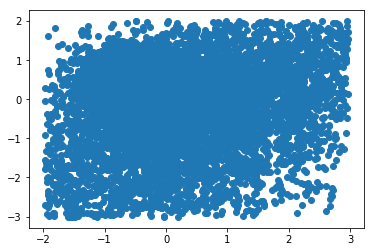

In [126]:
import matplotlib.pyplot as plt 
plt.scatter(X_train_scaled[:,2], X_train_scaled[:,1])

In [166]:
Data_test = pd.concat([signal.iloc[5000:15000],BG.iloc[5000:25000]])
Data_test = shuffle(Data_test).reset_index(drop=True)
X_test = Data_test.iloc[:,:-1].values
y_test = Data_test['label'].values
X_test_scaled = scaler.transform(X_test)

### Class für die Klassifikation


In [319]:
class KNN:
    '''KNN Classifier.

    Attributes
    ----------
    k : int
        Number of neighbors to consider.
    '''
    def __init__(self, k):
        '''Initialization.
        Parameters are stored as member variables/attributes.
        
        Parameters
        ----------
        k : int
            Number of neighbors to consider.
        '''
        self.k = k

    def fit(self, X, y):
        '''Fit routine.
        Training data is stored within object.
        
        Parameters
        ----------
        X : numpy.array, shape=(n_samples, n_attributes)
            Training data.
        y : numpy.array shape=(n_samples)
            Training labels.
        '''
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        '''Prediction routine.
        Predict class association of each sample of X.
        
        Parameters
        ----------
        X : numpy.array, shape=(n_samples, n_attributes)
            Data to classify.
        
        Returns
        -------
        prediction : numpy.array, shape=(n_samples)
            Predictions, containing the predicted label of each sample.
        '''
        labels = []
        for j in range(0,len(X)):
            distance = np.sqrt( np.sum(  (X[j]-self.X_train)**2, axis=1  ) )
            indices = np.argsort(distance)[:self.k]
            if sum(self.y_train[indices]) < 0.5*self.k:
                labels.append(0)
            else:
                labels.append(1)
        return np.array(labels)

In [320]:
k = KNN(5)
k.fit(X_train_scaled, y_train)
results = k.predict(X_test_scaled[:1000])
results 

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,